# 3.4 Classifying movie reviews


## 3.4.1 The IMDB Dataset


In [1]:
from tensorflow.keras.datasets import imdb

In [2]:
# Importing the data to training and testing sets
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\hotal\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\hotal\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or

In [3]:
# Training data consists of vectors pointing to words in the word index. 
train_data[0][:5] 

[1, 14, 22, 16, 43]

In [4]:
# Two possible classifications 
# Negative and Positive
set(train_labels)

{0, 1}

In [5]:
# Verifying the vocabulary limit set to 10,000 
max([max(sequence) for sequence in train_data])

9999

In [6]:
# Getting the word dictionary from the dataset
word_index = imdb.get_word_index()

# Reversing the dictionary for easier indexing
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])

# Building a review using the training array and the reversed dictionary
decoded_review = ' '.join([reverse_word_index.get(i - 3 , '?') for i in train_data[8728]])

# Printing the review
print(decoded_review)

? it was just a terrible movie no one should waste their time go see something else this movie is without a doubt one of the worst movies i have ever seen in my life if you want to see a good movie don't see made men


## 3.4.2 Preparing the data

In [7]:
import numpy as np

# Convert the training arrays into a 2D array with the columns representing the words used.
def vectorize_sequence(sequences, dimensions = 10000):
    """
    Return a 2D array with the columns representing the word usage of each entry.
    Parameters
    ----------
    sequences : array_like
        Array representing the word usage in each entry
    dimensions : data-type, optional
        Number of columns in the 2D array
    """

    results = np.zeros((len(sequences), dimensions))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1
    return results

In [8]:
# Vectorize the training and testing datasets
X_train = vectorize_sequence(train_data)
X_test = vectorize_sequence(test_data)

In [9]:
# Verify the target attributes are numeric and in array format
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 3.4.3 Building your network

In [10]:
# Import keras libraries
from keras import models, layers, losses, metrics, optimizers

In [11]:
# Creating a neural net with shape (1000,16,16,1)
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [12]:
model.compile(optimizer='rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [13]:
model.compile(optimizer = optimizers.RMSprop(lr = 0.001), 
             loss = losses.binary_crossentropy, 
             metrics = [metrics.binary_accuracy])

## 3.4.4 Validating your approach

In [14]:
# Splitting the data into validation sets
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
model.compile(optimizer='rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [16]:
# Training the neural network
history = model.fit(partial_X_train, 
                  partial_y_train, 
                  epochs = 20, 
                  batch_size = 512, 
                  validation_data = (X_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 66ms/step - loss: 0.5796 - acc: 0.7081 - val_loss: 0.3859 - val_acc: 0.8609
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3149 - acc: 0.9025 - val_loss: 0.3153 - val_acc: 0.8744
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2250 - acc: 0.9296 - val_loss: 0.2931 - val_acc: 0.8840
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1697 - acc: 0.9490 - val_loss: 0.2747 - val_acc: 0.8909
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1372 - acc: 0.9585 - val_loss: 0.2903 - val_acc: 0.8870
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1053 - acc: 0.9718 - val_loss: 0.3118 - val_acc: 0.8804
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0864 - acc: 0.9768 - val_loss: 0.3176 - val_acc: 0.8821
Epoch 8/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0713 - a

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [18]:
import matplotlib.pyplot as plt

In [19]:
history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(acc)+ 1)

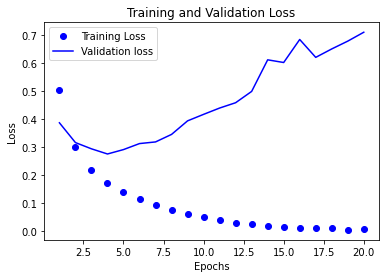

In [20]:
plt.plot(epochs, loss_values,  'bo', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

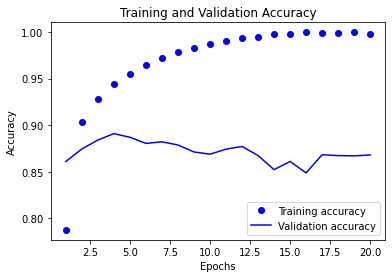

In [21]:
plt.plot(epochs, acc,  'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [22]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

model.fit(partial_X_train,
          partial_y_train, 
          epochs = 4, 
          batch_size = 512)

results = model.evaluate(X_test, y_test)
results

Epoch 1/4
30/30 [==============================] - 1s 14ms/step - loss: 0.5916 - accuracy: 0.6956
Epoch 2/4
30/30 [==============================] - 0s 13ms/step - loss: 0.3190 - accuracy: 0.9001
Epoch 3/4
30/30 [==============================] - 0s 13ms/step - loss: 0.2268 - accuracy: 0.9267
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2921 - accuracy: 0.8835


[0.292120099067688, 0.8835200071334839]

## 3.4.5 Using a trained neural network to generate predictions on new data

In [23]:
model.predict(X_test)

array([[0.25748008],
       [0.9994006 ],
       [0.9178364 ],
       ...,
       [0.10280168],
       [0.12940067],
       [0.5308584 ]], dtype=float32)

<AxesSubplot:>

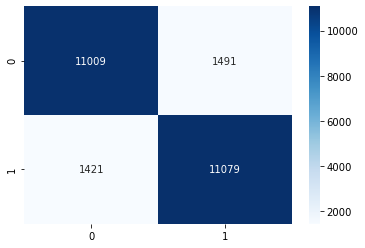

In [24]:
import sklearn.metrics as metrics
from seaborn import heatmap

confusion_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=np.round(model.predict(X_test)))
heatmap(confusion_matrix, annot = True, cmap='Blues', fmt='g')

## 3.4.6 Further Experiments

You used two hidden layers. Try using one or three hidden layers, and see how
doing so affects validation and test accuracy

### One Hidden Layer

782/782 [==============================] - 1s 2ms/step - loss: 0.5227 - acc: 0.8542
[0.5226899981498718, 0.854200005531311]


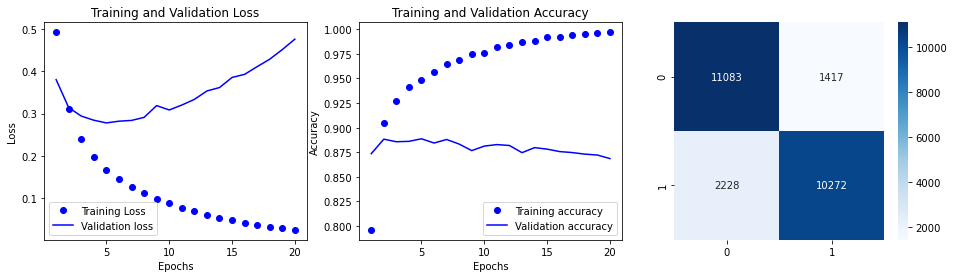

In [25]:
# Creating a neural net with shape (1000,16,1)
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

# Training the neural network
history = model.fit(partial_X_train, 
                  partial_y_train, 
                  epochs = 20, 
                  batch_size = 512, 
                  validation_data = (X_val, y_val), verbose = False)

results = model.evaluate(X_test, y_test)
print(results)

history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(acc) + 1)

# Plotting metrics
fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(16,4))

ax1.plot(epochs, loss_values,  'bo', label = 'Training Loss')
ax1.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(epochs, acc,  'bo', label = 'Training accuracy')
ax2.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend()

confusion_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=np.round(model.predict(X_test)))
heatmap(confusion_matrix, annot = True, cmap='Blues', fmt='g', ax = ax3);

### Three Hidden Layers

782/782 [==============================] - 1s 2ms/step - loss: 0.8454 - acc: 0.8520
[0.8454091548919678, 0.8519600033760071]


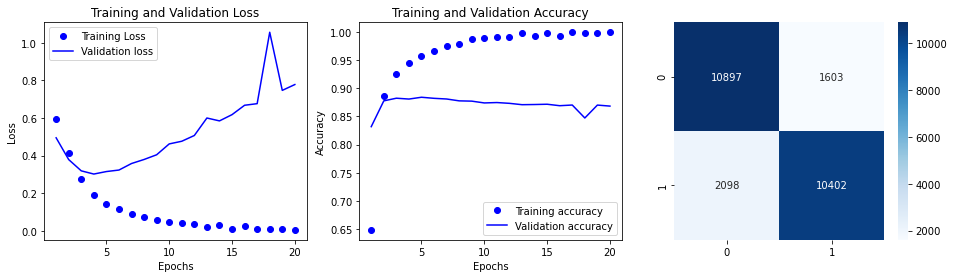

In [26]:
# Creating a neural net with shape (1000,16,16,16,1)
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

# Training the neural network
history = model.fit(partial_X_train, 
                  partial_y_train, 
                  epochs = 20, 
                  batch_size = 512, 
                  validation_data = (X_val, y_val), verbose = False)
results = model.evaluate(X_test, y_test)
print(results)

history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(acc) + 1)

# Plotting metrics
fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(16,4))

ax1.plot(epochs, loss_values,  'bo', label = 'Training Loss')
ax1.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(epochs, acc,  'bo', label = 'Training accuracy')
ax2.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend()

confusion_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=np.round(model.predict(X_test)))
heatmap(confusion_matrix, annot = True, cmap='Blues', fmt='g', ax = ax3);

Try using layers with more hidden units or fewer hidden units: 32 units, 64 units,
and so on.

### 32 Hidden Units


782/782 [==============================] - 1s 2ms/step - loss: 0.8922 - acc: 0.8517
[0.892244815826416, 0.8516799807548523]


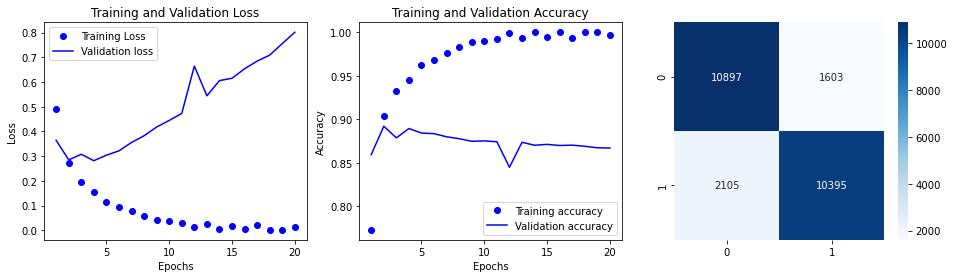

In [27]:
# Creating a neural net with shape (1000,32,32,1)
model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

# Training the neural network
history = model.fit(partial_X_train, 
                  partial_y_train, 
                  epochs = 20, 
                  batch_size = 512, 
                  validation_data = (X_val, y_val), verbose = False)

results = model.evaluate(X_test, y_test)
print(results)

history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(acc) + 1)

# Plotting metrics
fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(16,4))

ax1.plot(epochs, loss_values,  'bo', label = 'Training Loss')
ax1.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(epochs, acc,  'bo', label = 'Training accuracy')
ax2.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend()

confusion_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=np.round(model.predict(X_test)))
heatmap(confusion_matrix, annot = True, cmap='Blues', fmt='g', ax = ax3);

### 64 Hidden Units

782/782 [==============================] - 2s 2ms/step - loss: 1.0645 - acc: 0.8495
[1.06448233127594, 0.8495200276374817]


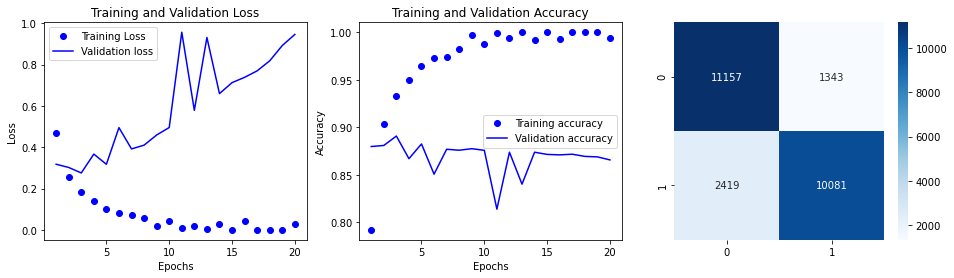

In [28]:
# Creating a neural net with shape (1000,64,64,1)
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

# Training the neural network
history = model.fit(partial_X_train, 
                  partial_y_train, 
                  epochs = 20, 
                  batch_size = 512, 
                  validation_data = (X_val, y_val), verbose = False)

results = model.evaluate(X_test, y_test)
print(results)

history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(acc) + 1)

# Plotting metrics
fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(16,4))

ax1.plot(epochs, loss_values,  'bo', label = 'Training Loss')
ax1.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(epochs, acc,  'bo', label = 'Training accuracy')
ax2.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend()

confusion_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=np.round(model.predict(X_test)))
heatmap(confusion_matrix, annot = True, cmap='Blues', fmt='g', ax = ax3);

Try using the mse loss function instead of binary_crossentropy

### MSE Loss Function

782/782 [==============================] - 1s 2ms/step - loss: 0.1192 - acc: 0.8539
[0.11920086294412613, 0.853879988193512]


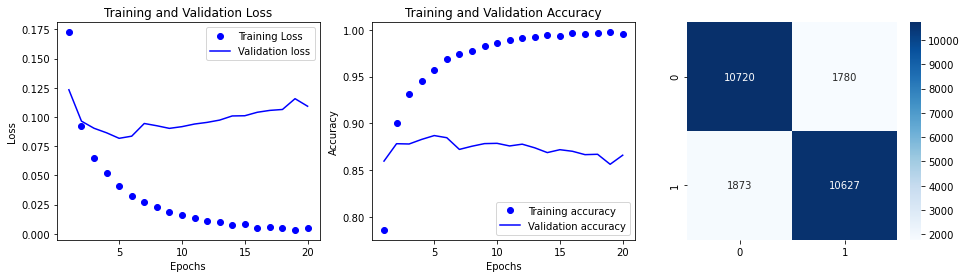

In [29]:
# Creating a neural net with shape (1000,16,16,1) and a loss function using mse instead of binary_crossentropy
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop', 
              loss = 'mse', 
              metrics = ['acc'])

# Training the neural network
history = model.fit(partial_X_train, 
                  partial_y_train, 
                  epochs = 20, 
                  batch_size = 512, 
                  validation_data = (X_val, y_val), verbose = False)

results = model.evaluate(X_test, y_test)
print(results)

history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(acc) + 1)

# Plotting metrics
fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(16,4))

ax1.plot(epochs, loss_values,  'bo', label = 'Training Loss')
ax1.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(epochs, acc,  'bo', label = 'Training accuracy')
ax2.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend()

confusion_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=np.round(model.predict(X_test)))
heatmap(confusion_matrix, annot = True, cmap='Blues', fmt='g', ax = ax3);

Try using the tanh activation (an activation that was popular in the early days of
neural networks) instead of relu.

### tanh Activation

782/782 [==============================] - 1s 2ms/step - loss: 0.8946 - acc: 0.8446
[0.8946225643157959, 0.8446000218391418]


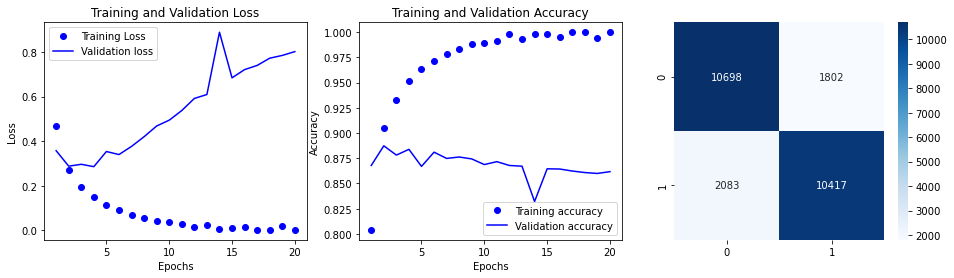

In [30]:
# Creating a neural net with shape (1000,16,16,1) and with tanh activation functions
model = models.Sequential()
model.add(layers.Dense(16, activation = 'tanh', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'tanh'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

# Training the neural network
history = model.fit(partial_X_train, 
                  partial_y_train, 
                  epochs = 20, 
                  batch_size = 512, 
                  validation_data = (X_val, y_val), verbose = False)

results = model.evaluate(X_test, y_test)
print(results)

history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(acc) + 1)

# Plotting metrics
fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(16,4))

ax1.plot(epochs, loss_values,  'bo', label = 'Training Loss')
ax1.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(epochs, acc,  'bo', label = 'Training accuracy')
ax2.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend()

confusion_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=np.round(model.predict(X_test)))
heatmap(confusion_matrix, annot = True, cmap='Blues', fmt='g', ax = ax3);